In [7]:
# Data processing and visualization library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import plotly.graph_objects as go
import plotly.express as px
# Tensorflow and keras library
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import load_model
# ScikitLearn library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Misc
import sys
import os
import random
from unicodedata import name
from datetime import datetime

print("To ensure repeatability, use the following setup:")
print("TensorFlow version:", "2.10.0")
print("Numpy version:", '1.23.4')
print("Pandas version:", '1.5.2')
print("SKLearn version:", "1.1.3")
print("Python version:", "3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]")
print("==============================")
print("Your current library version:")
print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SKLearn version:", sklearn.__version__)
print("Python version:",sys.version)

To ensure repeatability, use the following setup:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
Your current library version:
TensorFlow version: 2.10.0
Numpy version: 1.23.4
Pandas version: 1.5.2
SKLearn version: 1.1.3
Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


In [2]:
# Get the current directory
current_directory = os.getcwd()
# Construct the relative path to the CSV file
csv_filename1 = 'datasetscsv/trainval_set.csv'
csv_filename2 = 'datasetscsv/test_set.csv'
csv_filename3 = 'datasetscsv/master_dataset.csv'
csv_filename4 = 'datasetscsv/allMolecule.csv'
csv_path1 = os.path.join(current_directory, csv_filename1)
csv_path2 = os.path.join(current_directory, csv_filename2)
csv_path3 = os.path.join(current_directory, csv_filename3)
csv_path4 = os.path.join(current_directory, csv_filename4)
seed = 21
random.seed(seed)

model_name = 'Model/SWISH_WnD.h5'
model_path = os.path.join(current_directory, model_name)
folder_name = 'Model/Visual'
folder_path = os.path.join(current_directory, folder_name)

In [3]:
# Importing dataset
trainval_df = pd.read_csv(csv_path1, names=["Molecule", "Formula","SMILES","Type","Cyclicity",
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
test_df     = pd.read_csv(csv_path2, names=["Molecule", "Formula","SMILES","Type","Cyclicity", 
                                       "Primary counts","Secondary counts","Tertiary counts",
                                       "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                       "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                       "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                       "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                       "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                       "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                       "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                       "MW","Partial Pressure","Temperature",
                                       "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration", "Abbreviation"]) 
# PREPROCESSING
X_test_label = test_df.drop(columns=["Absorption Capacity"])
y_test = test_df['Absorption Capacity']

X_trainval_label =  trainval_df.drop(columns=["Absorption Capacity"])
y_trainval_label = trainval_df['Absorption Capacity']

# DATA SPLITING
X_train, X_val, y_train, y_val = train_test_split(X_trainval_label, y_trainval_label, test_size=0.20, random_state=seed)

# Reserve the dataset for visualization
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()
X_reserved = pd.concat([X_train_1, X_val_1, X_test_label], axis=0)

# DROPPING STRINGS AND DATA PREPROCESSING
X_train = X_train.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_test = X_test_label.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])
X_val = X_val.drop(columns=["Molecule", "Formula", "SMILES", "Type", "Cyclicity", "References", "Rounded Concentration", "Abbreviation"])

feature_names = X_train.columns.tolist()
preprocessor = Pipeline(steps=[('step1', StandardScaler())])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_names)

X_val = pipeline.transform(X_val)
X_val = pd.DataFrame(X_val, columns=feature_names)

X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=feature_names)

master_df = pd.read_csv(csv_path3, 
    names=["Molecule","Formula","SMILES","Type","Cyclicity",
           "Primary counts","Secondary counts","Tertiary counts",
           "Hydroxyl counts","Carboxyl counts","Oxyl counts",
           "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
           "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
           "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
           "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
           "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
           "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
           "MW","Partial Pressure","Temperature",
           "Amine Concentration", "Absorption Capacity", "References","Rounded Concentration","Abbreviation"]) 
scaler = preprocessor.named_steps['step1']
mean_values = scaler.mean_[27] # pressure structure
std_values = scaler.scale_[27] # pressure structure

len(X_train)

2383

75/75 [==============================] - 0s 2ms/step
Train data RMSE:  0.07332510687812666
Train data MAE:  0.047792139644374294
Train data R^2:  0.9645999726275404
19/19 [==============================] - 0s 1ms/step
Validation data RMSE:  0.09293478436751261
Validation data MAE:  0.058930134036087746
Validation data R^2:  0.9481187325023597
4/4 [==============================] - 0s 2ms/step
Test data RMSE:  0.10271345917975686
Test data MAE:  0.07521465493063642
Test data R^2:  0.860148082492637


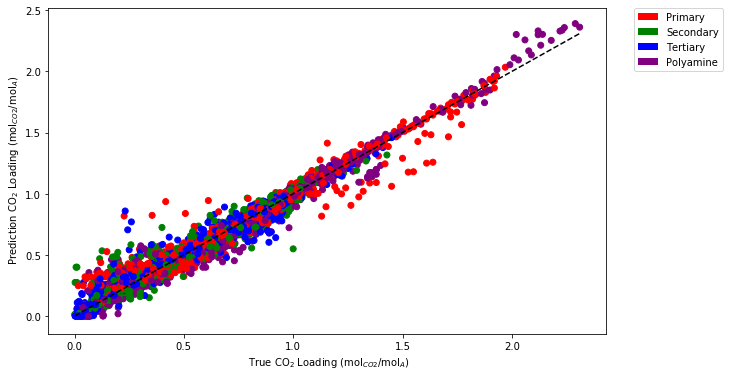

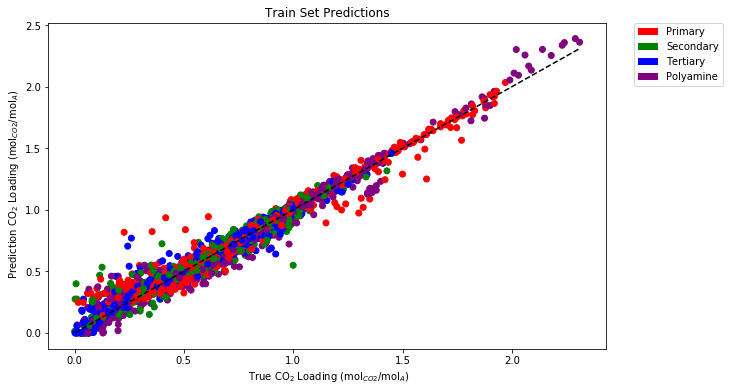

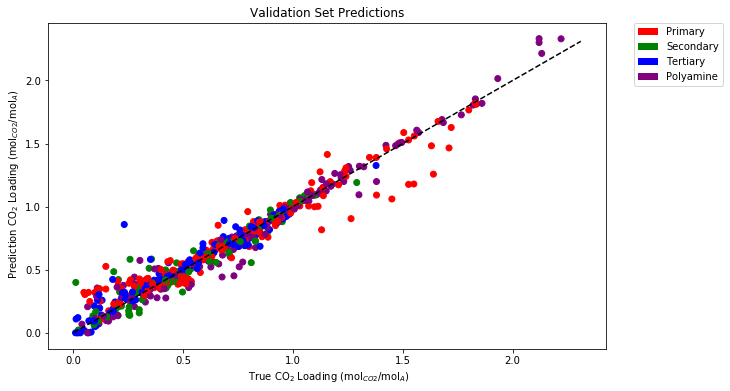

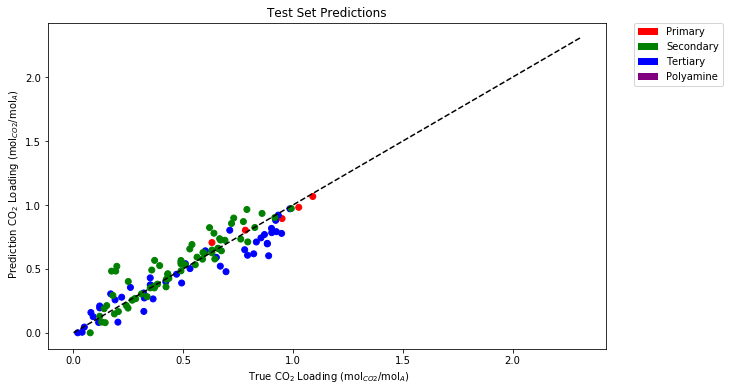

In [4]:
# evaluate the model on the test data
loaded_model = load_model(model_path)
model = loaded_model
y_train_pred = model.predict(X_train)
print("Train data RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train data MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train data R^2: ", r2_score(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
print("Validation data RMSE: ", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation data MAE: ", mean_absolute_error(y_val, y_val_pred))
print("Validation data R^2: ", r2_score(y_val, y_val_pred))

y_test_pred = model.predict(X_test)
print("Test data RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test data MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test data R^2: ", r2_score(y_test, y_test_pred))

averaged_r_score = (r2_score(y_train, y_train_pred)+r2_score(y_test, y_test_pred)+r2_score(y_val, y_val_pred))/3
#print("Averaged R^2: ", averaged_r_score)

dz_1 = X_train_1['Type']
df_1 = pd.DataFrame(dz_1)

dz_2 = X_test_label['Type']
df_2 = pd.DataFrame(dz_2)

dz_3 = X_val_1['Type']
df_3 = pd.DataFrame(dz_3)

# Assign a color to each categorical value (train__set)
colors_1 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_1['color'] = df_1['Type'].map(colors_1)

# Assign a color to each categorical value (train__set)
colors_2 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_2['color'] = df_2['Type'].map(colors_2)

# Assign a color to each categorical value (train__set)
colors_3 = {'Primary': 'red', 'Secondary': 'green', 'Tertiary': 'blue', 'Polyamine': 'purple'}
df_3['color'] = df_3['Type'].map(colors_3)

#Visualize predictions for train, test, and validation data
x_vals = np.linspace(min(y_train), max(y_train), 100)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c=df_1['color'])
plt.scatter(y_test, y_test_pred, c=df_2['color'])
plt.scatter(y_val, y_val_pred, c=df_3['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Plotting the predictions for the train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c=df_1['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Train Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Plotting the predictions for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, c=df_3['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Validation Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Plotting the predictions for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, c=df_2['color'])
plt.plot(x_vals, x_vals, color='black', linestyle='--')
plt.title('Test Set Predictions')
plt.xlabel(' True CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
plt.ylabel(' Prediction CO$_{2}$ Loading (mol$_{CO2}$/mol$_{A}$)')
legend_elements = [
    matplotlib.patches.Patch(facecolor=color, label=label)
    for label, color in colors_1.items()
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [5]:
exp_data          = pd.read_csv(csv_path3, 
                                names=["Molecule","Formula","SMILES","Type","Cyclicity",
                                          "Primary counts","Secondary counts","Tertiary counts",
                                          "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                          "M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                          "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                          "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                          "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                          "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                          "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                          "MW","Partial Pressure","Temperature",
                                          "Amine Concentration", "Absorption Capacity", "References","Concentration","Abbreviation"])

exp_data          = exp_data.drop(columns = ["M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                                "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                                "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                                "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                                "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                                "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                                "MW","Formula","SMILES","Type","Cyclicity",
                                                "Primary counts","Secondary counts","Tertiary counts",
                                                "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                                "Amine Concentration"])
exp_data          = exp_data[['Molecule','Partial Pressure','Temperature','Concentration','Absorption Capacity','References','Abbreviation']]
Molecule_var      = master_df.drop(columns='Absorption Capacity')
Molecule_var      = Molecule_var.drop_duplicates(subset = 'Molecule')
Molecule_var      = Molecule_var.reset_index(drop=True)
#Assigning index for each molecule
Molecule_id       = Molecule_var.drop(columns= ["M0(nhb)", "M0(oh)", "M0(nh)", "M0(op)", 
                                                "M1(nhb_donor)", "M1(nhb_weak)", "M1(nhb_acceptor)",
                                                "M1(oh_donor)", "M1(oh_weak)","M1(oh_acceptor)",
                                                "M1(nh_donor)", "M1(nh_weak)", "M1(nh_acceptor)",
                                                "M1(op_donor)", "M1(op_weak)", "M1(op_acceptor)",
                                                "M2(nhb)", "M2(oh)", "M2(nh)","M2(op)",
                                                "MW","Partial Pressure","Temperature",
                                                "Formula","SMILES","Type","Cyclicity",
                                                "Primary counts","Secondary counts","Tertiary counts",
                                                "Hydroxyl counts","Carboxyl counts","Oxyl counts",
                                                "Amine Concentration","References","Rounded Concentration"])
Molecule_id       = Molecule_id.reset_index(drop=True)
exp_data.head()

#separating temperature variation for indices
exp_T = exp_data.drop(columns = ["Molecule", "Partial Pressure", "Concentration", "References", "Absorption Capacity","Abbreviation"])
T_var = exp_T.drop_duplicates(subset = 'Temperature')
T_var = T_var.reset_index(drop=True)
T_var = T_var.sort_values(by=['Temperature'], ascending=True)
T_var = T_var.reset_index(drop=True)

#separating concentration variation for indices
exp_C = exp_data.drop(columns = ["Molecule", "Partial Pressure", "Temperature", "References", "Absorption Capacity","Abbreviation"])
C_var = exp_C.drop_duplicates(subset = 'Concentration')
C_var = C_var.reset_index(drop=True)
C_var = C_var.sort_values(by=['Concentration'], ascending=True)
C_var = C_var.reset_index(drop=True)

#separating reference variation for indices
exp_ref = exp_data.drop(columns = ["Molecule", "Partial Pressure", "Temperature", "Concentration", "Absorption Capacity","Abbreviation"])
ref_var = exp_ref.drop_duplicates(subset = 'References')
ref_var = ref_var.reset_index(drop=True)
ref_var = ref_var.sort_values(by=['References'], ascending=True)
ref_var = ref_var.reset_index(drop=True)

In [6]:
#Change variable 'name' with abbreviation of desired
#molecule to analyse. Refer to variable 'Molecule_id'
name = 'MDEA' 
sel_mol = Molecule_id[Molecule_id['Abbreviation'] == name ]
sel_mol_index = sel_mol.index[0]
species = sel_mol_index
size = 10000
fold = 100
PCO2                       = np.concatenate([np.linspace(0, 100, int(size/fold))]*fold) # PARTIAL PRESSURE IN kPa
T                          = np.repeat(np.linspace(280, 330, int(size/fold)),fold) # TEMPERATURE IN KELVIN'
co_v                       = np.array([1,3,5])


dat1 = []
dat2 = []
dat3 = []
for k in range(len(co_v)):
    C                          = np.ones(size)*co_v[k]  #CONCENTRATION IN MOLAR
    # Create Prediction Set
    Prediction_set= pd.DataFrame(data={
                #DESCRIPTOR
                'Primary counts'                   : np.ones(size)*Molecule_var.iloc[species]['Primary counts'],
                'Secondary counts'                 : np.ones(size)*Molecule_var.iloc[species]['Secondary counts'],
                'Tertiary counts'                  : np.ones(size)*Molecule_var.iloc[species]['Tertiary counts'],
                'Hydroxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Hydroxyl counts'],
                'Carboxyl counts'                  : np.ones(size)*Molecule_var.iloc[species]['Carboxyl counts'],
                'Oxyl counts'                      : np.ones(size)*Molecule_var.iloc[species]['Oxyl counts'],
                'M0(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M0(nhb)'],
                'M0(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(oh)'],
                'M0(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(nh)'],
                'M0(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M0(op)'],
                'M1(nhb_donor)'                    : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_donor)'],
                'M1(nhb_weak)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_weak)'],
                'M1(nhb_acceptor)'                 : np.ones(size)*Molecule_var.iloc[species]['M1(nhb_acceptor)'],
                'M1(oh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(oh_donor)'],
                'M1(oh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(oh_weak)'],
                'M1(oh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(oh_acceptor)'],
                'M1(nh_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(nh_donor)'],
                'M1(nh_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(nh_weak)'],
                'M1(nh_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(nh_acceptor)'],
                'M1(op_donor)'                     : np.ones(size)*Molecule_var.iloc[species]['M1(op_donor)'],
                'M1(op_weak)'                      : np.ones(size)*Molecule_var.iloc[species]['M1(op_weak)'],
                'M1(op_acceptor)'                  : np.ones(size)*Molecule_var.iloc[species]['M1(op_acceptor)'],
                'M2(nhb)'                          : np.ones(size)*Molecule_var.iloc[species]['M2(nhb)'],
                'M2(oh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(oh)'],                
                'M2(nh)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(nh)'],
                'M2(op)'                           : np.ones(size)*Molecule_var.iloc[species]['M2(op)'],
                'MW'                               : np.ones(size)*Molecule_var.iloc[species]['MW'],
                #OPERATING CONDITION
                'Partial Pressure'                 : PCO2, #x axis in 3d plot
                'Temperature'                      : T, #y axis in 3d plot
                'Amine Concentration'              : C            
                })

    Prediction_set_new = pipeline.transform(Prediction_set)
    column_names = Prediction_set.columns.tolist()
    Prediction_set_new = pd.DataFrame(Prediction_set_new, columns=column_names)

    #Prediction
    z_pred = loaded_model.predict(Prediction_set_new)

    Var1 = 'Temperature'
    Var2 = 'Partial Pressure'

    v1 = 'Temperature [K]'
    v2 = 'Partial Pressure [kPa]'
    #plot 3D
    grid_results = pd.concat([pd.DataFrame(Prediction_set[Var1]),pd.DataFrame(Prediction_set[Var2]), pd.DataFrame(z_pred, columns=['Predicted Absorption molCO2/molAmine'])], axis=1)
    grid_results.head()

    grid_contour = grid_results.groupby([Var1,Var2]).mean()
    grid_contour

    grid_reset = grid_contour.reset_index()
    grid_reset.columns = [Var1,Var2, 'Predicted Absorption molCO2/molAmine']
    grid_pivot = grid_reset.pivot(index = Var1, columns = Var2)
    grid_pivot

    x = grid_pivot.columns.levels[1].values
    y = grid_pivot.index.values
    z = grid_pivot.values

    dat1.append(x)
    dat2.append(y)
    dat3.append(z)

min_z = np.min([np.min(dat) for dat in dat3])
max_z = np.max([np.max(dat) for dat in dat3])
# X and Y axes labels
layout = go.Layout(
    title='Prediction Plot',
    scene=dict(
        xaxis_title=f'{Var2} [kPa]',
        yaxis_title=f'{Var1} [K]',
        zaxis_title='CO<sub>2</sub> Loading [mol<sub>CO<sub>2</sub></sub> / mol<sub>A</sub>]',
        xaxis=dict(gridcolor='black', zerolinecolor='black', range=[min(PCO2), max(PCO2)]),
        yaxis=dict(gridcolor='black', zerolinecolor='black', range=[min(T), max(T)]),
        zaxis=dict(gridcolor='black', zerolinecolor='black', range=[min_z, max_z], dtick = 0.1),
        camera=dict(eye=dict(x=1.2, y=2.2, z=0)),  # Adjust camera position for better view
        aspectratio=dict(x=1, y=1, z=1),  # Adjust aspect ratio for better proportions
        bgcolor='white'  # Set background color here ('white', 'black', or any other color)
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    font=dict(  
        family='Times New Roman',  
        size=11.5,  
        color='black')
)

fig = go.Figure(data=
                [go.Surface(z=dat3[0], y=dat2[0], x=dat1[0], colorscale='Reds', colorbar=dict(len=0.6), showscale=False),
                 go.Surface(z=dat3[1], y=dat2[1], x=dat1[1], colorscale='Greens', showscale=False, opacity=1),
                 go.Surface(z=dat3[2], y=dat2[2], x=dat1[2], colorscale='Blues', showscale=False, opacity=1)], layout=layout)

fig.show()

313/313 [==============================] - 0s 1ms/step
